<a href="https://colab.research.google.com/github/LavanyaRagavi/DS_Internship/blob/main/ds_Lavanyas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
trader_df = pd.read_csv("/content/csv_files/historical_data.csv")
sentiment_df = pd.read_csv("/content/csv_files/fear_greed_index.csv")

# Display first few rows
print("Trader Data:")
display(trader_df.head())

print("Market Sentiment Data:")
display(sentiment_df.head())

# Basic info
trader_df.info()
sentiment_df.info()

Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Market Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
trader_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [7]:
import pandas as pd

# Convert trader timestamp to datetime
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')

# Extract date only (ignore hours/minutes)
trader_df['date'] = trader_df['Timestamp IST'].dt.date

# Convert sentiment dataset's 'date' column
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Check conversion
print(trader_df[['Timestamp IST', 'date']].head())
print(sentiment_df[['date', 'classification']].head())

        Timestamp IST        date
0 2024-02-12 22:50:00  2024-02-12
1 2024-02-12 22:50:00  2024-02-12
2 2024-02-12 22:50:00  2024-02-12
3 2024-02-12 22:50:00  2024-02-12
4 2024-02-12 22:50:00  2024-02-12
         date classification
0  2018-02-01           Fear
1  2018-02-02   Extreme Fear
2  2018-02-03           Fear
3  2018-02-04   Extreme Fear
4  2018-02-05   Extreme Fear


In [8]:
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(' ', '_')
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [9]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

In [10]:
merged_df[['date', 'classification']].sample(10)
merged_df['classification'].value_counts()

,count
classification,
Fear,13869
Greed,11292
Extreme Greed,5621
Neutral,2756
Extreme Fear,2326


In [13]:
merged_df.to_csv('/content/csv_files/merged_trader_sentiment.csv', index=False)

In [14]:
# Basic info and shape
print(merged_df.shape)
print(merged_df.columns)

# Check few records
merged_df.head(5)

# Quick numeric summary
merged_df.describe()

# Count of Fear vs Greed
merged_df['classification'].value_counts()

(211224, 18)
Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date', 'classification'],
      dtype='object')


,count
classification,
Fear,13869
Greed,11292
Extreme Greed,5621
Neutral,2756
Extreme Fear,2326


/tmp/ipython-input-1896524803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='classification', palette='Set2')


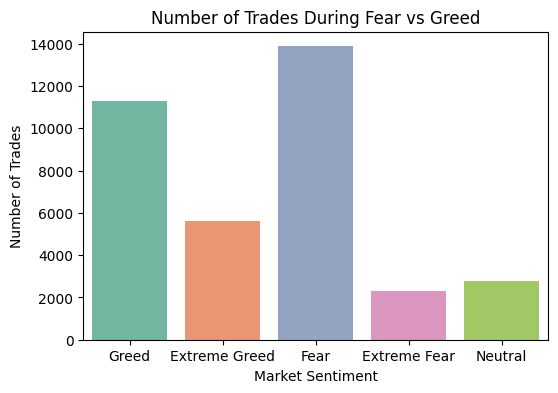

In [15]:
# Trader Activity Distribution by Sentiment
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, x='classification', palette='Set2')
plt.title('Number of Trades During Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')

plt.savefig('/content/outputs/trade_count.png', bbox_inches='tight', dpi=300)
plt.show()

/tmp/ipython-input-4212207136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='closed_pnl', palette='coolwarm')


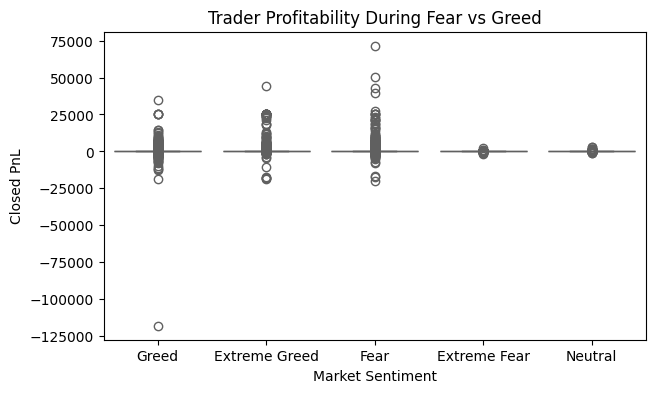

,closed_pnl
classification,
Extreme Fear,1.891632
Extreme Greed,205.816345
Fear,128.287950
Greed,53.988003
Neutral,27.088803


In [16]:
# Profitability Comparison (Fear vs Greed)
plt.figure(figsize=(7,4))
sns.boxplot(data=merged_df, x='classification', y='closed_pnl', palette='coolwarm')
plt.title('Trader Profitability During Fear vs Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')

plt.savefig('/content/outputs/profit_comparison_count.png', bbox_inches='tight', dpi=300)
plt.show()

# Average PnL per sentiment
merged_df.groupby('classification')['closed_pnl'].mean()

/tmp/ipython-input-3482827204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='classification', y='size_usd', palette='husl')


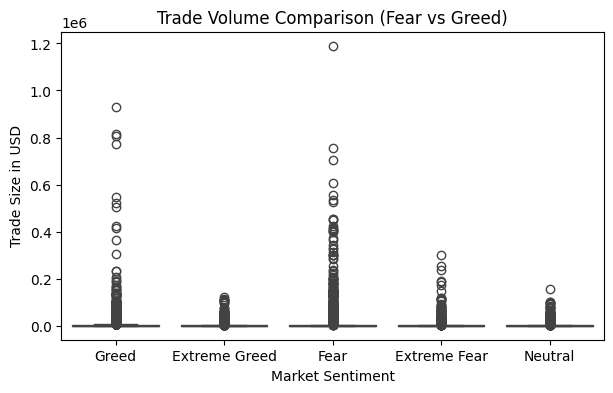

,size_usd
classification,
Extreme Fear,4118.761840
Extreme Greed,3242.085086
Fear,5744.782685
Greed,5051.878829
Neutral,4332.202906


In [17]:
# Trade Size and Volume
plt.figure(figsize=(7,4))
sns.boxplot(data=merged_df, x='classification', y='size_usd', palette='husl')
plt.title('Trade Volume Comparison (Fear vs Greed)')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Size in USD')

plt.savefig('/content/outputs/trade_sizenvolume.png', bbox_inches='tight', dpi=300)
plt.show()

# Mean trade size
merged_df.groupby('classification')['size_usd'].mean()

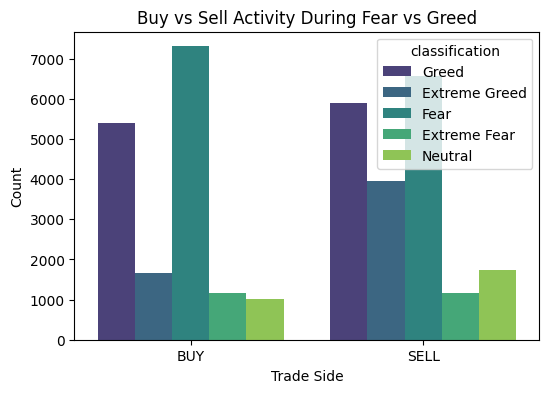

In [18]:
# Buy vs Sell Side Behavior
plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, x='side', hue='classification', palette='viridis')
plt.title('Buy vs Sell Activity During Fear vs Greed')
plt.xlabel('Trade Side')
plt.ylabel('Count')

plt.savefig('/content/outputs/buy_sell_behaviour.png', bbox_inches='tight', dpi=300)
plt.show()

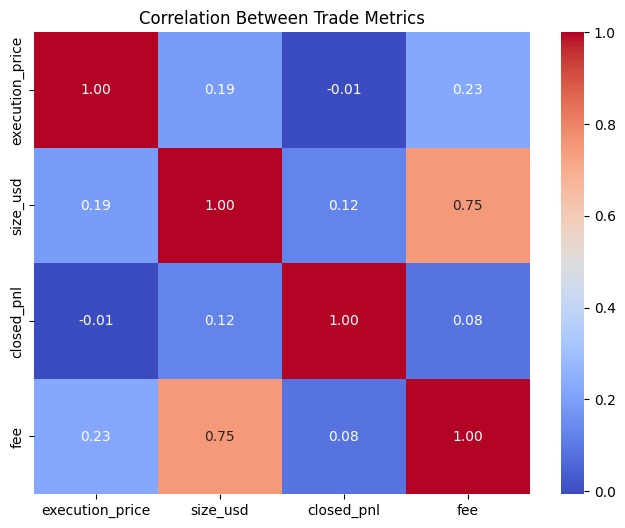

In [19]:
# Correlation Heatmap (Numerical Trends)
plt.figure(figsize=(8,6))
corr = merged_df[['execution_price', 'size_usd', 'closed_pnl', 'fee']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Trade Metrics')

plt.savefig('/content/outputs/heatmap.png', bbox_inches='tight', dpi=300)
plt.show()


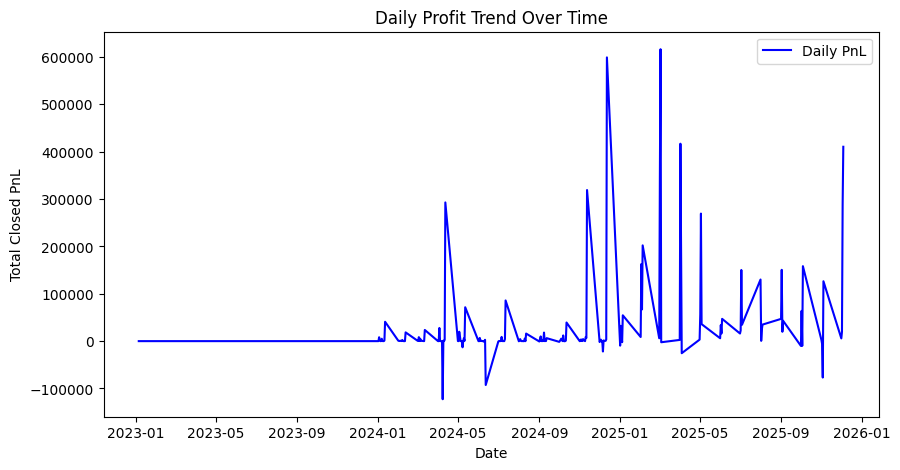

In [20]:
# Daily Profit Trend with Sentiment Overlay
daily_pnl = merged_df.groupby('date')['closed_pnl'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=daily_pnl, x='date', y='closed_pnl', label='Daily PnL', color='blue')
plt.title('Daily Profit Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Closed PnL')

plt.savefig('/content/outputs/daily_profit_trend.png', bbox_inches='tight', dpi=300)
plt.show()
